In [1]:
# Global Superstore Orders Data Analysis

## 1. Data Preparation

!pip install kaggle

In [3]:
import zipfile
from kaggle.api.kaggle_api_extended import KaggleApi
import os

In [4]:
os.environ['KAGGLE_USERNAME'] = 'liudmilashegal'
os.environ['KAGGLE_KEY'] = '/content/kaggle.json'

In [5]:
api = KaggleApi()
api.authenticate()

In [6]:
import kaggle

In [7]:
kaggle.api.dataset_download_files('juhi1994/superstore', path='.', unzip=True)

Dataset URL: https://www.kaggle.com/datasets/juhi1994/superstore


In [8]:
import pandas as pd

In [10]:
data =pd.read_excel('/content/US Superstore data.xls')

In [11]:
print(data.head())

   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   South  FUR-BO-10

In [12]:
print(data.describe())

            Row ID                     Order Date  \
count  9994.000000                           9994   
mean   4997.500000  2016-04-30 00:07:12.259355648   
min       1.000000            2014-01-03 00:00:00   
25%    2499.250000            2015-05-23 00:00:00   
50%    4997.500000            2016-06-26 00:00:00   
75%    7495.750000            2017-05-14 00:00:00   
max    9994.000000            2017-12-30 00:00:00   
std    2885.163629                            NaN   

                           Ship Date   Postal Code         Sales     Quantity  \
count                           9994   9994.000000   9994.000000  9994.000000   
mean   2016-05-03 23:06:58.571142912  55190.379428    229.858001     3.789574   
min              2014-01-07 00:00:00   1040.000000      0.444000     1.000000   
25%              2015-05-27 00:00:00  23223.000000     17.280000     2.000000   
50%              2016-06-29 00:00:00  56430.500000     54.490000     3.000000   
75%              2017-05-18 00:00:00

In [13]:
print(data.isnull().sum())

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [14]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [22]:
data.shape

(9994, 22)

In [15]:
data['Year'] = data['Order Date'].dt.year

In [16]:
## 2. Interactive Line Chart for Sales Trends Over the Years
import plotly.express as px

In [17]:
year_df = data.copy()

In [18]:
sales_trend = year_df.groupby('Year')['Sales'].sum().reset_index()

fig = px.line(sales_trend, x='Year', y='Sales', title='Sales Trends Over the Years')
fig.show()

The plot shows, that for the last 2 years sales range grows intensively.

In [19]:
## 3. Interactive Map to Visualize Sales Distribution by Country

country_df = data.copy()

In [20]:
country_sales = country_df.groupby('Country')['Sales'].sum().reset_index()

fig = px.choropleth(country_sales, locations='Country', locationmode='country names', color='Sales',
                    title='Sales Distribution by Country', hover_name='Country')
fig.show()

The distribution shows, that our products are sold only in the US. It is more informative to make a plot, based on cities or regions.  

In [21]:
## 4. Bar Chart Showing Top 10 Products by Sales

import plotnine as p9

In [23]:
top_df = data.copy()

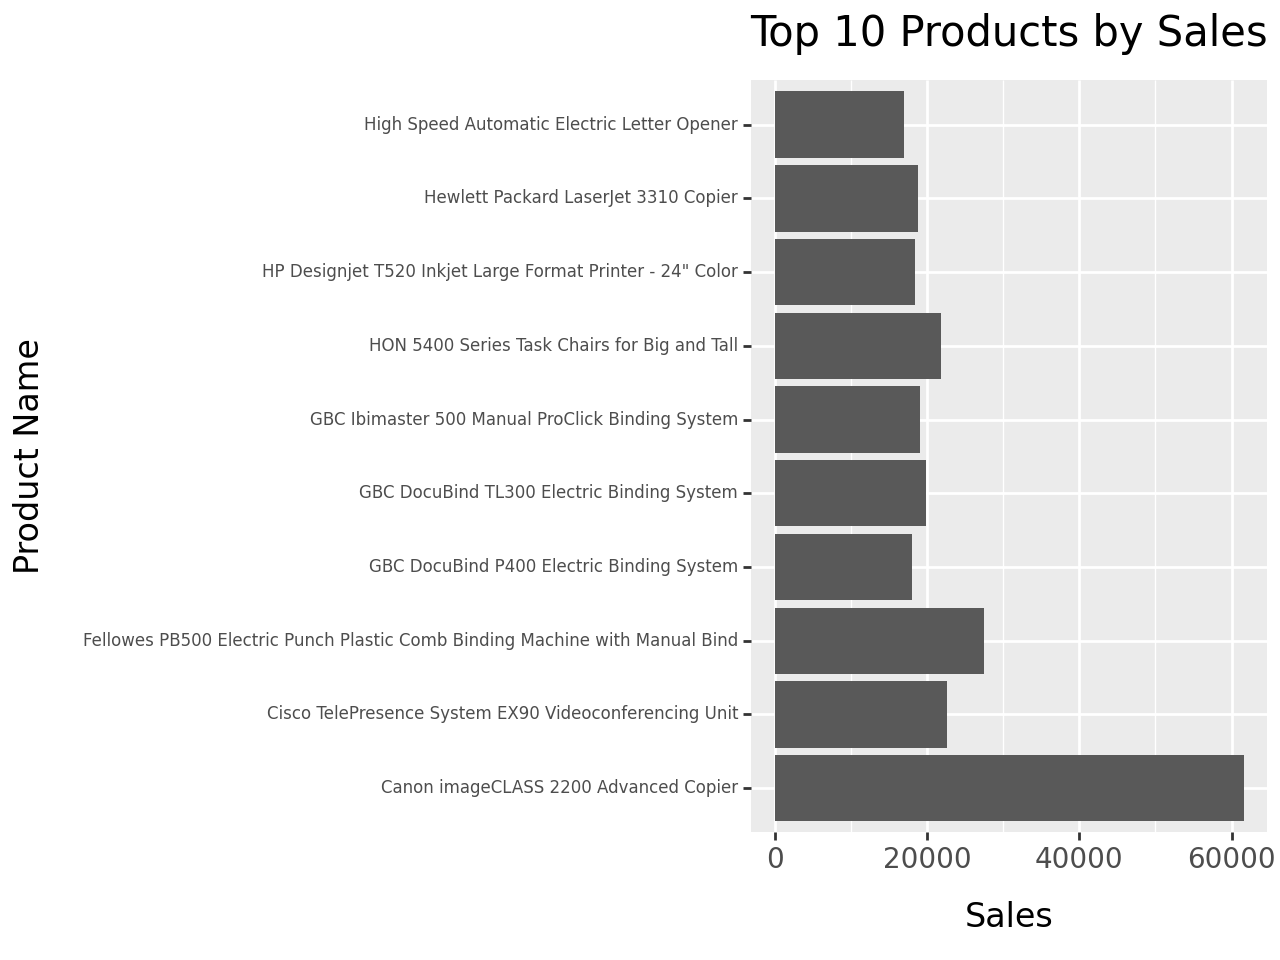

In [32]:
top_products = top_df.groupby('Product Name')['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False).head(10)

plot = (p9.ggplot(top_products, p9.aes(x='Product Name', y='Sales')) +
        p9.geom_bar(stat='identity') +
        p9.coord_flip() +
        p9.labs(title='Top 10 Products by Sales', x='Product Name', y='Sales')+
p9.theme(
            plot_title=p9.element_text(hjust=0.5, size=15),
            axis_text_y=p9.element_text(size=6, margin={'r': 10}),
            axis_text_x=p9.element_text(size=10),
            axis_title_x=p9.element_text(size=12, margin={'t': 10}),
            axis_title_y=p9.element_text(size=12, margin={'r': 10})
        ))
print(plot)

We can see, that sales driver is Canon imageCLASS 2200 Advanced Copier, that has x2 sales, than other leaders.

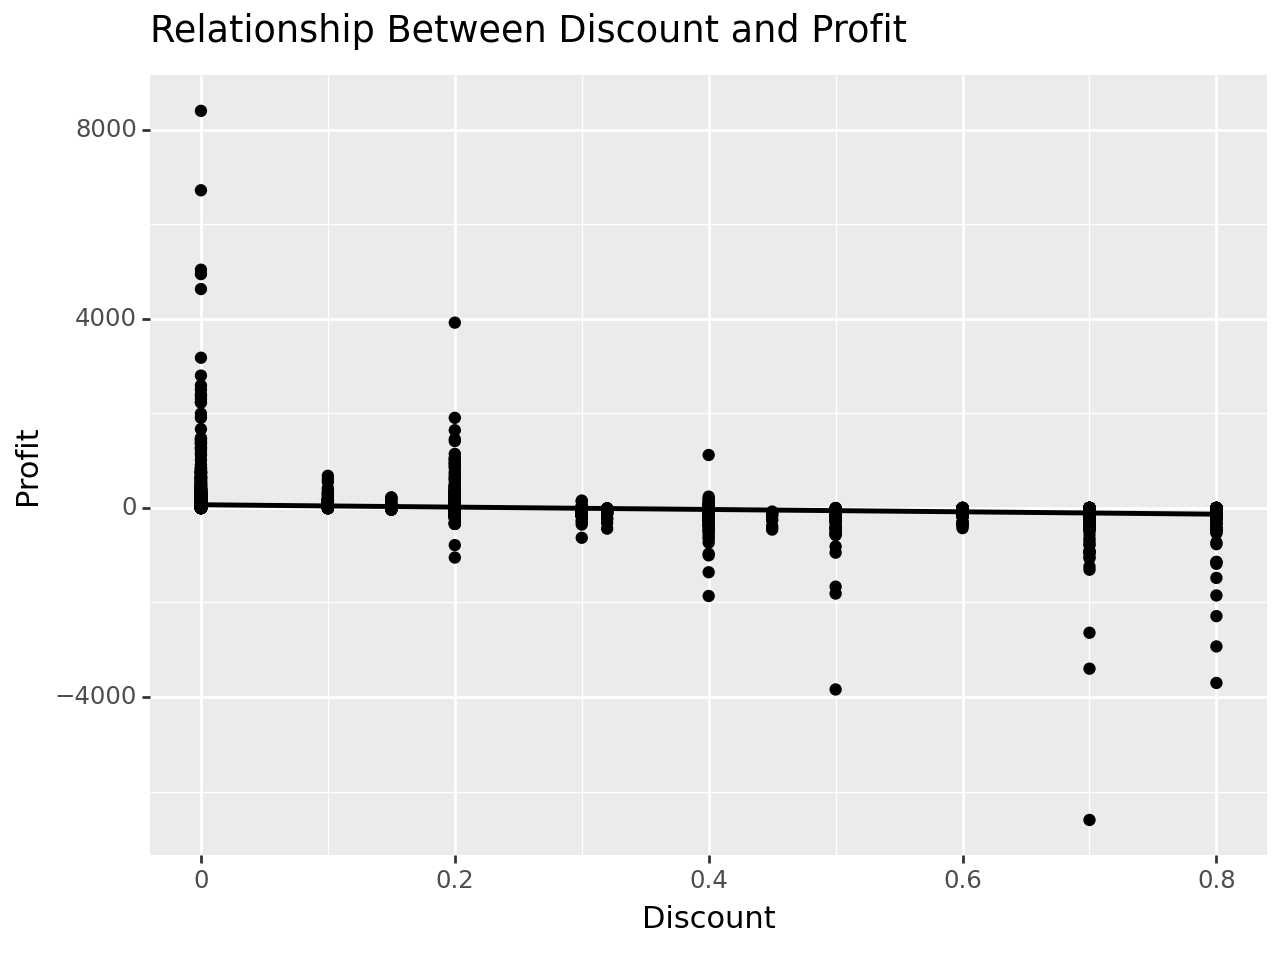

In [33]:
## 5. Scatter Plot to Analyze the Relationship Between Profit and Discount

plot = (p9.ggplot(data, p9.aes(x='Discount', y='Profit')) +
        p9.geom_point() +
        p9.geom_smooth(method='lm') +
        p9.labs(title='Relationship Between Discount and Profit', x='Discount', y='Profit'))
print(plot)

There is no real correlation between profit and discount. But it's not true

## 6. Comparative Analysis

Plotly:

Interactive Line Chart: Plotly's interactive features allow for a more dynamic exploration of data trends over time. Hovering over data points provides additional details, making it easy to spot specific trends and anomalies.

Interactive Map: The choropleth map created with Plotly provides a visually engaging way to see sales distribution across countries. The interactivity helps in understanding regional sales performance quickly.

Ease of Use: Plotly is user-friendly for creating interactive plots with minimal code. The ability to easily customize and interact with plots makes it a powerful tool for exploratory data analysis.

Effectiveness: Plotly is highly effective for creating detailed and interactive visualizations. It is particularly useful when interactivity and immediate feedback are required.

Plotnine:

Bar Chart: Plotnine's bar chart is effective in showcasing the top 10 products by sales. Although not interactive, it provides a clear and concise visualization.

Scatter Plot: The scatter plot created with Plotnine helps in analyzing the relationship between profit and discount. It effectively highlights how different levels of discounts impact profit margins.

Ease of Use: Plotnine follows a grammar of graphics approach similar to ggplot2 in R. It requires a bit more code and understanding of its grammar, but it is very powerful for creating complex and layered plots.

Effectiveness: Plotnine is excellent for creating static, publication-quality visualizations. Its flexibility and comprehensive customization options make it suitable for detailed analytical work.